# K-means on a wines dataset SOLUTION
We will neeed a few libraries for clustering:
* Numpy and Pandas for data handling
* Matplotlib for visualisation (and mpl_toolkits.mplot3d if you want to plot in 3d - optional)
* SKlearn for the k-means model:
    * Decomposition if we want to do some PCA on our dataset (optional)
    * Model_selection for dividing up our dataset 
    * datasets for the wine dataset
    * Cluster for our k-means model "blueprint"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from sklearn import decomposition, model_selection, datasets, cluster

Now, lets load our dataset in and inspect it, and load it into a dataframe for easier use

In [4]:
wines_dataset = datasets.load_wine()

In [5]:
wines_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
wines_df = pd.DataFrame(data=wines_dataset.data, columns=wines_dataset.feature_names)

In [7]:
wines_df["label"] = wines_dataset.target

In [8]:
wines_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Prepare training and test datasets
Let's look at the attributes - the "x" data - separate from the labels ("y").

This comes from the idea that any model is a simple function where 
$$answers = AI\ model(attributes)$$
or more simply
$$y = f(x)$$

We only need to define an X and y, as this in an unsupervised model.

In [12]:
X=wines_df.iloc[:, 0:13]  # Features
y=wines_df['label']  # Labels

# Visualisation
Because we can't plot in 14 dimensions (or at least we wouldn't be able to understand it) we need to represetn the information in two dimensions. We can either pick up to three attriibutes to visualise at once, or we create three artifical axes with Principal Component Analysis

#### PCA
For a 3d plot of the 3 princiap axes of the dataset we need to:
* create a plot environment with a default 
* use the sklearn.decomposition module to run a 3d pca on the X data.
* For each class, plot the points

<IPython.core.display.Javascript object>


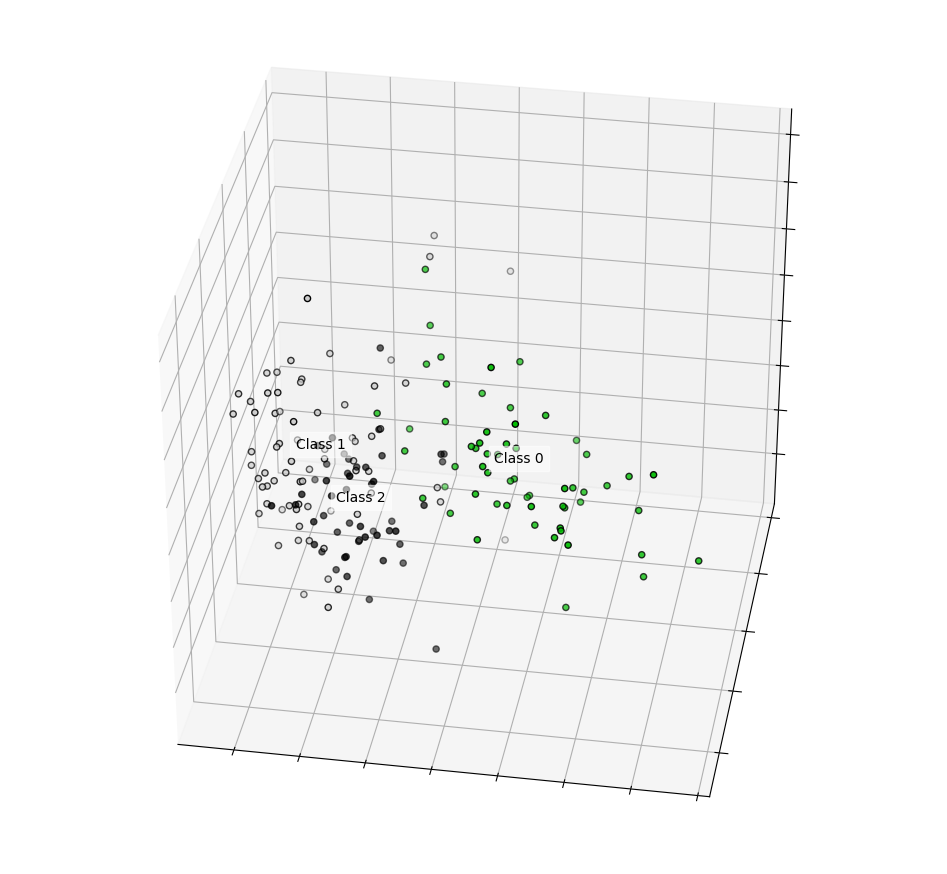

In [18]:
pca_X = wines_dataset.data
pca_y = wines_dataset.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(pca_X)
pca_X = pca.transform(pca_X)

for name, label in [('Class 0', 0), ('Class 1', 1), ('Class 2', 2)]:
    ax.text3D(pca_X[y == label, 0].mean(),
              pca_X[y == label, 1].mean() + 1.5,
              pca_X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
pca_y = np.choose(pca_y, [1, 2, 0]).astype(np.float)
ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=pca_y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Kmeans
Once the data is ready, we need to create a model to train. We are going to be creating an "instance" of the K-Means sklearn class

the .KMeans class needs to know how many clusters it needs to look for - we already know we need 3.

We then need to train the model on the training data, both x and y. In this case, we'll shortcut by using fit_predict as we are approaching it in an unsupervised manner.

In [14]:
clusterer = cluster.KMeans(n_clusters=3, verbose=True)

In [15]:
predictions = clusterer.fit_predict(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3697594.627253714
start iteration
done sorting
end inner loop
Iteration 1, inertia 2885843.6347244596
start iteration
done sorting
end inner loop
Iteration 2, inertia 2745495.6615789933
start iteration
done sorting
end inner loop
Iteration 3, inertia 2705730.9830267318
start iteration
done sorting
end inner loop
Iteration 4, inertia 2703780.833820737
start iteration
done sorting
end inner loop
Iteration 5, inertia 2661276.085419761
start iteration
done sorting
end inner loop
Iteration 6, inertia 2643225.3628675463
start iteration
done sorting
end inner loop
Iteration 7, inertia 2640539.1759215984
start iteration
done sorting
end inner loop
Iteration 8, inertia 2637940.789426584
start iteration
done sorting
end inner loop
Iteration 9, inertia 2636700.360085081
start iteration
done sorting
end inner loop
Iteration 10, inertia 2633555.332409339
start iteration
done sorting
end inner loop
Iteration 11,

Now let's replot our clusters with PCA again

<IPython.core.display.Javascript object>


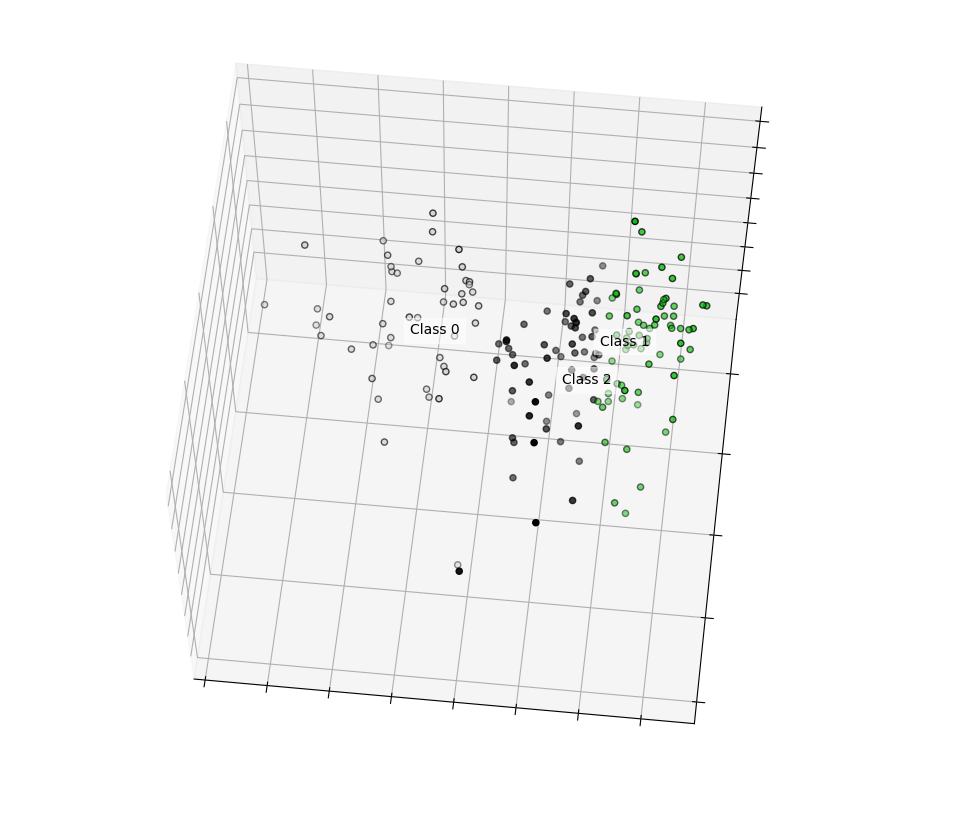

In [16]:
pca_X = wines_dataset.data
pca_y = predictions

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(pca_X)
pca_X = pca.transform(pca_X)

for name, label in [('Class 0', 0), ('Class 1', 1), ('Class 2', 2)]:
    ax.text3D(pca_X[y == label, 0].mean(),
              pca_X[y == label, 1].mean() + 1.5,
              pca_X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
pca_y = np.choose(pca_y, [1, 2, 0]).astype(np.float)
ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=pca_y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()